# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: December 7, 2022
* Student Name: Bruce A. McGregor
* Student Net ID: BMP3K
* This URL: https://github.com/bmcgregor22/DS5100_Final_Project_BM3PK/blob/main/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL:
https://github.com/bmcgregor22/DS5100_Final_Project_BM3PK

# The Monte Carlo Module

In [43]:
import pandas as pd
import numpy as np

class Die():
    """
    This class define method for a die object, which represents a variety of random variables
    The constructor takes a array object of faces as an argument.

    Attributes:
    -----------
    self.die_obj - the data defining an instance of die as a data frame
    self.faces - an array object of faces established an instance creation. The array may be an array of strings or an array of numbers.  The array cannot have any duplicate values.

    Methods:
    -----------
    init_(self, faces) - initializes the class taking an array of faces as an argument. A array of a faces is passed as an argument. The array may be an array of strings or numbers.
    change_weight(self, a_side, a_weight) - changes the weight of one of the sides of the die
    roll_die(self, num_rolls=1) - rolls an instance of a die the number of times specfied by num_rolls
    show_die(self) - displays the die's current defintion of faces and weights
    """

    def __init__(self, faces):
        """
        This is the initializer method for class Die. It creates an instance of the die with the specified number of faces. By default, all sides are initially assigned a weight=1.
        """

        #save the values in the array as a unique set of values
        self.faces=np.unique(faces)

        #create a die object data frame and initialize all weightd to 1
        self.die_df=pd.DataFrame({'face':self.faces, 'weight':1.0})


    def change_weight(self, a_face, a_weight):
        """
        This method changes the weight of one of the sides of the die to the specified weight.

        arg[1] specifies  the face that is to be changed
        arg[2] specified the weight that the face will be changed
        """

        self.face=a_face
        self.weight=a_weight

        #check to see that the provided side is defined for the die object.
        if self.face in self.die_df.set_index('face').index:

            #update the value of weight in the data frame to the weight given by the argument
            self.die_df.loc[self.die_df['face'] == self.face, ['weight']] = self.weight


        else :
            #if the face does not exist in the array then exit
            raise Exception("Value for face not in the face array. Must specify a valid value for face")

        #verify that the value passes as a_weight can be converted to a float
        try:
            float(a_weight)
        except:

            # if the conversion to float fails, then exit
            raise Exception("Invalid argument specificed for weight. Weight must be of type integer or float.")



    def roll_die(self, num_rolls=1):
        """
        Method to roll the die by a specified number of times. The default number of rolls is 1. The method returns a list of outcomes of the each roll.
        """

        self.num_rolls = num_rolls
        outcomes = []


        for i in range(self.num_rolls):
            result = self.die_df.face.sample(weights=self.die_df.weight).values[0]
            outcomes.append(result)
        return outcomes


    def show_die(self):
        """
        Method to show the current set of die faces and weights, reflecting any changes to weights. Returns the die object as a panda dataframe.
        """

        return self.die_df

class Game():
    """
    A class representing a game. A game consists of rolling one or more die of the same kind one or more times. In a given game, each die has the same number of sides and set of faces,
    but each die may have different weights.

    Attributes
    ----------
    self.die_objects - a list of die objects created by the Die class, defined with same number of sides and set of faces.

    Methods
    ---------
     __init__(self,l_die_objects) - intializer method to create the game instance using a list of already instantiated die objects

    play(self, num_rolls) - rolls reach die the number of times specified by the argument num_rolls

    show_results(self, format="W') - displays the results of the game in wide format by default. For narrow format, specify format='N'

    """

    def __init__(self, l_die_objects):
        """
        Create the game instance based on a list of die objects
        """

        #initialize the game with a list of similarily defined  die objects.
        self.die_objects = l_die_objects

    def play(self,num_rolls):
        """
        Rolls each of the die objects the num_rolls number of times.

        _game_results - private data frame to store results

        """

        #pass in the number of times the dice should be rolled
        self.num_rolls = num_rolls

        #create a data frame to store the game results and set the first column as the Roll Number
        self._game_results = pd.DataFrame({'Roll Number':range(1, self.num_rolls+1)})


        #for each die object, call the roll_die method and roll the number of times specified by num_rolls
        for i in range(len(self.die_objects)):

            #get a list of the results of each die object rolled the specified number of rolls
            results = self.die_objects[i].roll_die(self.num_rolls)

            #create a column for results for each die and concatenate it to the data frame in wide format
            self.results = pd.Series(results, name=i+1)
            self._game_results=pd.concat([self._game_results, self.results],axis=1)

        #make the roll number the named index for the data frame
        self._game_results.set_index(['Roll Number'],inplace=True)

        #rename the column axis with descriptive label
        self._game_results.rename_axis(columns="Die Number", inplace=True)


    def show(self, format='W'):
        """
        Displays the result of the data frame in narrow or wide format. Wide format is the default. The argument is
        specified as  W for wide, or N for narrow.

        Wide format will have a single column index with the roll number, and each die number as a column
        Narrow format will have a two-column index with the roll number and die number, and a single column for the face
        rolled

        _game_results_narrow - private dataframe to store the narrow format with two column index

        """

        self.format = format
        if self.format == 'W':

            return self._game_results

        elif self.format =='N':

            #convert to a narrow format
            _game_results_narrow = self._game_results.stack().to_frame('Face Rolled')

            return _game_results_narrow
        else:
            raise TypeError("Invalid argument specificed for format. Format argument expect 'N' or 'W'. ")


class Analyzer():
    """
    Analyzes the results of a game and produces various statistics about the game such as the number of jackpots and combinations

    Attributes
    ---------
    face_counts_per_roll_df - a dataframe storing the count of the  number of faces per roll

    jackpot - the number of jackpots rolled

    jackpot_df - an data frame storing the number of jackpots

    combo_df = a dataframe storing the distinct combinations rolled and their counts


    Methods
    ---------
    __init__ (self, a_game_object) - constructor method based on being passed a game object

    face_counts_per_roll(self) - method to compute how many times a given face is rolled in each event.

    jackpot(self) - method to compute the number of jackpots in a game

    combo(self) - method to compute the number of distinct combinations produced in a game

    """

    def __init__(self, a_game_object):
        """
        Creates an instance of the Analyzer class provided the game results.

        Arg1 - a game object instance
        """

        #store the dataframe results in the narrow and wide format
        self.game_results_data_n = a_game_object.show('N')
        self.game_results_data_w = a_game_object.show()



    def face_counts_per_roll(self):
        """
        Computes how many times a given face is rolled in each event. Returns the results in a data frame face_counts_per_roll_df.
        """

        self.face_counts_per_roll_df = \
        self.game_results_data_n.\
        groupby(['Roll Number','Face Rolled']).\
        value_counts().\
        reset_index(name='Counts')

        return self.face_counts_per_roll_df


    def jackpot(self):
        """
        Compute the number of jackpots (rolls with the all the faces of the same value). Returns the number of jackpots rolled.
        """

        #use apply function to compute the lengths of each set, sets with length 1 are jackpots
        jackpot_df= self.game_results_data_w.apply(lambda x: len(set(x)), axis=1).\
        to_frame("jackpot")

        #filter data frame to just the sets of length 1 = these are the jackpots
        jackpot_df=jackpot_df[jackpot_df['jackpot']==1]

        #length of the data frame is the number of jackpots in game
        jackpot = len(jackpot_df)

        return jackpot


    def combo(self):
        """
        Computes the number of distinct combinatinos. Returns the combo_df dataframe.
        """

        combo_df = self.game_results_data_w.apply(lambda x: x.sort_values().squeeze(), axis=1).\
        value_counts().to_frame('n')

        return combo_df


# Test Module

In [ ]:
import unittest
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer

class MonteCarloTestSuite(unittest.TestCase):
    '''
    This test suite executes unit tests to verify that all class methods are working as designed.
    '''
        
    def test_1_create_die_set_weights(self):
        '''
        Unit test to test the initializer method for the Die Class.
        Verify that weights are set to 1 upon object creation for every face of the die.
        '''
        #create a test die
        test1 = Die(pd.array(data=[1,2,3,4,5,6]))
        print (test1.die_df)

        #test
        message = "The test result is false"

        # check to see if any weights are not equal to 1.0
        if  any(test1.die_df.loc[:,'weight']) != 1.0 :
            test_value = True
        else:
            test_value = False
        self.assertFalse(test_value, message)

    def test_2_change_die_weight(self):
        '''
        Unit test to test method change_weight for the Die class.
        Create a die change its weight passing an integer
        '''
        #create a test die
        test1 = Die(pd.array(data=[1,2,3,4,5,6]))
        print ("Printing the die before changing weight")
        print (test1.die_df)

        #change the weight of the first face to 3
        face = 1
        weight=3
        test1.change_weight(face,weight)

        #test that the resulting weight is a float
        expected = 3.0

        #extract the weight based on the value of the first face

        test_value = test1.die_df[test1.die_df.face==face].weight.item()

        print (test_value)
        self.assertEqual(test_value, expected)
        print ("Printing the die after weight of first face is changed")
        print (test1.die_df)

    def test_3_roll_die(self):
        '''
        Unit test to test the roll_die() method of the Die Class.
        Create a test tie and roll it 10 times. Verify that the resulting outcomes produces 10 results.
        '''
        #create a test die
        test1 = Die(pd.array(data=[1,2,3,4,5,6]))
        print (test1.die_df)
        #roll die 10 times
        outcomes = test1.roll_die(10)
        print ("Printing Outcomes :" + str(outcomes))

        # test
        message = "The test result is false"

        # check to see if 10 results were generated
        self.assertTrue(len(outcomes)==10, message)


    def test_4_show_die(self):
        """
        Unit test to test that the show_die method returns expected results.
        Create a test die with default weights, change the weights and then show that the die reflects all faces and weights (including changes)
        """
        #create a six sided test die
        test1 = Die(pd.array(data=[1,2,3,4,5,6]))
        print (test1.die_df)

        #change weights of three faces of the die
        test1.change_weight(1,2)
        test1.change_weight(2,3)
        test1.change_weight(3,4)

        #test results are a set of tuples with expected results of the die, three dies change weights
        expected = [(1,2),(2,3),(3,4),(4,1),(5,1),(6,1)]

        #create a list of tuples of faces and weights from show die method
        df = test1.show_die()
        test_value = list(zip(df.reset_index().face, df.weight))

        #compare the set of tuples to check they are equal
        self.assertEqual(test_value, expected)
        print (test1.die_df)

    def test_5_create_game(self):
        """
         Unit test to test if a game object was initialized correctly from the Game class.
         Create a game with three indentical die and verify that three die objects exist
        """
        # create three 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)
        myDie3 = Die(sides)

        # create list of three test tie
        test_die = [myDie1, myDie2, myDie3]

        # initialize a game object of three die and check the number of die objects
        test_game = Game(test_die)
        test = len(test_game.die_objects)

        expected = 3
        self.assertEqual(test,expected)

    def test_6_play_game(self):
        """
        Unit test to verify the result of the play method of the Game class.
        Create a game of 2 die and roll them 5 time verify the results includes a 10 element data frame.
        """
        # create two 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)

        # create list of two test tie
        test_die = [myDie1, myDie2]

        # initialize a game object of two die
        test_game = Game(test_die)

        #conduct the test
        test_game.play(5)
        test_results = test_game._game_results
        print("printing the test results\n"+ str(test_results))

        test=test_results.size

        #a 10 element data frame is expected from the game results
        expected = 10

        self.assertEqual(test,expected)

    def test_7_show(self):
        """
        Unit test to verify the results of the show method for specifying the Narrow format option
        Play a game and check the resulting data frame size for a narrow format.
        """
         # create two 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)

        # create list of two test tie
        test_die = [myDie1, myDie2]

        # initialize a game object of two die
        test_game = Game(test_die)

        #conduct the test
        test_game.play(5)
        test_results = test_game.show('N')
        print("printing the test results\n"+ str(test_results))
        test=test_results.size

        #a 10 element data frame is expected from the game results
        expected = 10

        self.assertEqual(test,expected)

    def test_8_analyzer(self):
        """
        Unit test to verify the result of the analyzer object initialization
        """
        # create two 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)

        # create list of two test tie
        test_die = [myDie1, myDie2]

        # initialize a game object of two die
        test_game = Game(test_die)
        test_game.play(5)

        #conduct the test - check the size of the data frame
        test_analysis = Analyzer(test_game)
        test= test_analysis.game_results_data_n.size

        #a 10 element data frame is expected from the game results
        expected = 10

        self.assertEqual(test,expected)

    def test_9_face_counts_per_roll(self):
        """
        Unit test to verify face counts per role method produces correct results
        """
        # create two 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)

        # create list of two test tie
        test_die = [myDie1, myDie2]

        # initialize a game object of two die
        test_game = Game(test_die)
        test_game.play(5)

        #generate the analyzer object
        test_analysis = Analyzer(test_game)
        test= test_analysis.face_counts_per_roll().size

        message="Test Failed"
        #check to see that the method returned a populated dataframe
        self.assertTrue(test > 0, message)

    def test_10_jackpot(self):
        """
        Unit test to verify jackpot return an integer
        """
        # create two 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)

        # create list of two test tie
        test_die = [myDie1, myDie2]

        # initialize a game object of two die
        test_game = Game(test_die)
        test_game.play(5)

        #generate the analyzer object
        test_analysis = Analyzer(test_game)

        message="Test Failed"
        #check to see that the method returned a populated dataframe
        self.assertTrue(isinstance(test_analysis.jackpot(), int), message)

    def test_11_combo(self):
        """
        Unit test to verify combo returns a populated dataframe
        """
        # create two 6 sided die
        sides = [1,2,3,4,5,6]
        myDie1 = Die(sides)
        myDie2 = Die(sides)

        # create list of two test tie
        test_die = [myDie1, myDie2]

        # initialize a game object of two die
        test_game = Game(test_die)
        test_game.play(5)

        #generate the analyzer object
        test_analysis = Analyzer(test_game)
        test=test_analysis.combo().size

        message="Test Failed"
        #check to see that the method returned a populated dataframe
        self.assertTrue(test > 0, message)



if __name__ == '__main__':
    unittest.main(verbosity=3)


# Test Results

test_10_jackpot (__main__.MonteCarloTestSuite)
Unit test to verify jackpot return an integer ... ok
test_11_combo (__main__.MonteCarloTestSuite)
Unit test to verify combo returns a populated dataframe ... ok
test_1_create_die_set_weights (__main__.MonteCarloTestSuite)
Unit test to test the initializer method for the Die Class. ... ok
test_2_change_die_weight (__main__.MonteCarloTestSuite)
Unit test to test method change_weight for the Die class. ... /Users/brucemcgregor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
ok
test_3_roll_die (__main__.MonteCarloTestSuite)
Unit test to test the roll_die() method of the Die Class. ... ok
test_4_show_die (__main__.MonteCarloTestSuite)
Unit test to test that the show_die method returns expected results. ... /Users/brucemcgregor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/Users/brucemcgregor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/Users/brucemcgregor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
ok
test_5_create_game (__main__.MonteCarloTestSuite)
Unit test to test if a game object was initialized correctly from the Game class. ... ok
test_6_play_game (__main__.MonteCarloTestSuite)
Unit test to verify the result of the play method of the Game class. ... ok
test_7_show (__main__.MonteCarloTestSuite)
Unit test to verify the results of the show method for specifying the Narrow format option ... ok
test_8_analyzer (__main__.MonteCarloTestSuite)
Unit test to verify the result of the analyzer object initialization ... ok
test_9_face_counts_per_roll (__main__.MonteCarloTestSuite)
Unit test to verify face counts per role method produces correct results ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.056s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [44]:
#Scenario 1: 2-headed Coin
import matplotlib.pyplot as plt
from montecarlo import Die, Game, Analyzer

sides = ['H','T']
fair_die=Die(sides)
unfair_die=Die(sides)

In [45]:
fair_die.show_die()

,face,weight
0,H,1.0
1,T,1.0


In [46]:
unfair_die.change_weight('H',5)

In [47]:
unfair_die.show_die()

,face,weight
0,H,5.0
1,T,1.0


In [48]:
#game is set-up for 1000 flips of three coins 1000 times
n_dice=3
n1=1000

In [49]:
#scenario 1 , game 1 - three coins with all fair dice
game_1_1_dice=([fair_die for i in range(n_dice)])

In [50]:
#create and run the first game
game_1_1 = Game(game_1_1_dice)

In [51]:
game_1_1.play(n1)
game_1_1.show()

Die Number,1,2,3
Roll Number,,,
1,H,T,T
2,H,T,H
3,T,H,T
4,T,T,T
5,H,H,T
...,...,...,...
996,H,T,T
997,T,T,H
998,H,T,T


In [52]:
#scenario 1 game 2 -
#set up game die for game 2
#create two unfair die and 1 fair die

game_1_2_dice=([unfair_die for i in range(2)])
game_1_2_dice

In [53]:
#add a third die which is fair
game_1_2_dice.append(fair_die)

In [54]:
#create and run the second game
game_1_2 = Game(game_1_2_dice)
game_1_2.play(n1)
game_1_2.show()

Die Number,1,2,3
Roll Number,,,
1,H,H,H
2,H,H,H
3,T,H,H
4,H,H,H
5,H,H,T
...,...,...,...
996,H,T,T
997,H,H,T
998,T,H,T


In [55]:
#use the analyzer to determine the relative frequency of jackpots 
#analyze games 
game_1_1_analysis = Analyzer(game_1_1)
game_1_2_analysis = Analyzer(game_1_2)

In [56]:
#compute the jackpots and their relative frequency
jp_1_1 = game_1_1_analysis.jackpot()
jp_1_2 = game_1_2_analysis.jackpot()
freq_jp_1_1 = jp_1_1/n1
freq_jp_1_2 = jp_1_2/n1

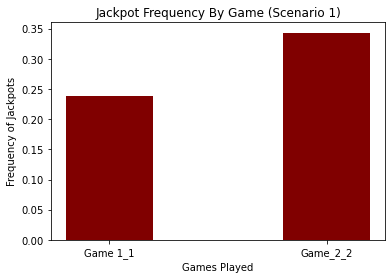

In [57]:
#plot the results for scenario 1

# creating the dataset
data = {'Game 1_1':freq_jp_1_1, 'Game_2_2':freq_jp_1_2}
games = list(data.keys())
freq = list(data.values())

# creating the bar plot
plt.bar(games, freq, color ='maroon',
        width = 0.4)
 
plt.xlabel("Games Played")
plt.ylabel("Frequency of Jackpots")
plt.title("Jackpot Frequency By Game (Scenario 1)")
plt.show()

## Scenario 2

In [58]:
#Scenario 2: Six Sided Die
import matplotlib.pyplot as plt
from montecarlo import Die, Game, Analyzer

sides = [1,2,3,4,5,6]
fair_die=Die(sides)
unfair_die1=Die(sides)
unfair_die2=Die(sides)


In [59]:
#change the weights of the unfair die
unfair_die1.change_weight(6,5)  #Type 1 - side 6 is weighted five more times than the others
unfair_die2.change_weight(1,5)  #Type 2 - side 1 is weighted five more times than the others

In [60]:
unfair_die1.show_die()

,face,weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [61]:
unfair_die2.show_die()

,face,weight
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [62]:
#scenario two will use 5 die rolled 10,000
n2=10000
n_dice=5

In [63]:
#Scenario 2, Game 1 - 5 fair die
game_2_1=Game([fair_die for i in range(n_dice)])

In [72]:
game_2_1.play(n2)
game_2_1.show()

Die Number,1,2,3,4,5
Roll Number,,,,,
1,5,1,5,6,4
2,2,1,6,5,6
3,2,6,1,6,6
4,4,5,3,5,6
5,2,2,5,2,5
...,...,...,...,...,...
9996,4,1,3,4,1
9997,3,6,1,1,3
9998,2,2,6,1,4


In [73]:
#Analyze Game 2_1
game_2_1_analysis = Analyzer(game_2_1)

In [74]:
jp_2_1 = game_2_1_analysis.jackpot()
freq_jp_2_1 = jp_2_1/n2

In [75]:
jp_2_1

7

In [76]:
freq_jp_2_1

0.0007

In [77]:
#Scenario 2 - Game 2 - 2 unfair dice of type 1, 1 unfair dice of type 2 and 2 fair dice
Game_2_die_set =[fair_die for  i in range(2)]

In [78]:
#two unfair die of type 1
Game_2_die_set_u1 = [unfair_die1 for i in range(2)]

In [79]:
#1 unfair die of type2
Game_2_die_set_u2 = [unfair_die2 for i in range(1)]

In [80]:
[Game_2_die_set.extend(l) for l in (Game_2_die_set_u1,Game_2_die_set_u2)]

[None, None]

In [81]:
Game_2_die_set

In [82]:
Game_2_die_set
game_2_2=Game(Game_2_die_set)
game_2_2.play(n2)
game_2_2.show()

Die Number,1,2,3,4,5
Roll Number,,,,,
1,6,2,6,4,3
2,5,2,2,2,1
3,5,6,3,6,1
4,6,5,6,5,5
5,1,4,6,6,1
...,...,...,...,...,...
9996,4,6,6,5,6
9997,6,2,5,6,6
9998,2,6,1,5,1


In [83]:
#Analyze Game 2_2
game_2_2_analysis = Analyzer(game_2_2)
jp_2_2 = game_2_2_analysis.jackpot()
freq_jp_2_2 = jp_2_2/n2

In [84]:
jp_2_2

10

In [85]:
freq_jp_2_2

0.001

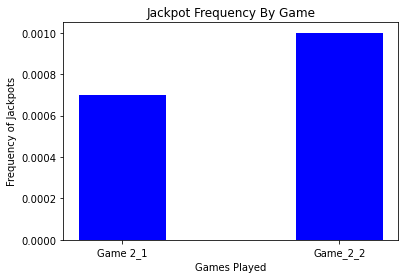

In [88]:
#plot the results
import matplotlib.pyplot as plt

# creating the dataset
data = {'Game 2_1':freq_jp_2_1, 'Game_2_2':freq_jp_2_2}
games = list(data.keys())
freq = list(data.values())

# creating the bar plot
plt.bar(games, freq, color ='blue',
        width = 0.4)
 
plt.xlabel("Games Played")
plt.ylabel("Frequency of Jackpots")
plt.title("Jackpot Frequency By Game")
plt.show()


In [89]:
#compute combinations game 1
game_2_1_combos = game_2_1_analysis.combo()
game_2_1_combos

n
1 2 3 4 5   
5 1 1 2 1  8
1 5 2 4 2  6
  6 5 5 1  6
    3 5 6  6
4 1 1 1 3  6
...       ..
3 5 1 3 4  1
      4 2  1
        5  1
    2 2 1  1
6 6 6 6 6  1

[5635 rows x 1 columns]

<AxesSubplot:xlabel='1,2,3,4,5'>

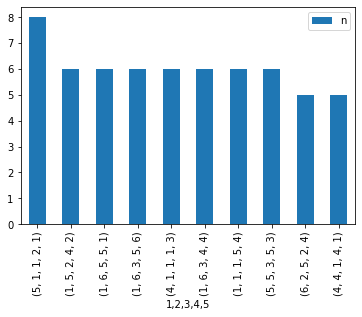

In [90]:
#plot the bar chart
x=game_2_1_combos.head(10)
x.plot.bar()

In [91]:
#compute combinations game 2
game_2_2_combos = game_2_2_analysis.combo()
game_2_2_combos

n
1 2 3 4 5    
5 6 6 6 1  48
  2 6 6 1  45
1 1 6 6 1  44
  6 6 6 1  44
2 5 6 6 1  43
...        ..
4 4 6 4 3   1
2 4 1 2 2   1
4 4 6 3 6   1
        5   1
3 6 6 4 4   1

[3727 rows x 1 columns]

<AxesSubplot:xlabel='1,2,3,4,5'>

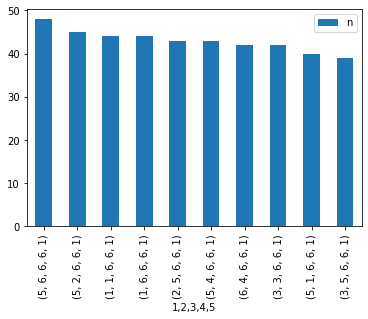

In [92]:
#plot the bar chart
x=game_2_2_combos.head(10)
x.plot.bar()

## Scenario 3

In [94]:
#scenario 3: Roman Alphabet
import matplotlib.pyplot as plt
from montecarlo import Die, Game, Analyzer
import string
sides = list(string.ascii_lowercase)

In [95]:
roman_die=Die(sides)
n3=1000

In [96]:
letter_freq_dict={"a":8.4966,
                  "b":2.0720,
                  "c":4.5388,
                  "d":3.3844,
                  "e":11.1607,
                  "f":1.8121,
                  "g":2.4705,
                  "h":3.0034,
                  "i":7.5448,
                  "j":0.1965,
                  "k":1.1016,
                  "l":5.4893,
                  "m":3.0129,
                  "n":6.6544,
                  "o":7.1635,
                  "p":3.1671,
                  "q":0.1962,
                  "r":7.5809,
                  "s":5.7351,
                  "t":6.9509,
                  "u":3.6308,
                  "v":1.0074,
                  "w":1.2899,
                  "x":0.2902,
                  "y":1.7779,
                  "z":0.2722
                 }

In [97]:
#set the weights of the die based on the frequency table
for x in letter_freq_dict:
    roman_die.change_weight(x,letter_freq_dict[x] )

In [98]:
roman_die.show_die()

,face,weight
0,a,8.4966
1,b,2.0720
2,c,4.5388
3,d,3.3844
4,e,11.1607
5,f,1.8121
6,g,2.4705
7,h,3.0034
8,i,7.5448
9,j,0.1965


In [100]:
#create a game with 5 roman die
game_3_die_set = [roman_die for i in range(5)]

In [101]:
game_3=Game(game_3_die_set)
game_3.play(n3)

In [102]:
game_3_results=game_3.show()
game_3_results

Die Number,1,2,3,4,5
Roll Number,,,,,
1,o,s,r,i,i
2,n,b,t,b,c
3,s,m,s,u,c
4,i,n,p,r,g
5,m,c,a,b,d
...,...,...,...,...,...
996,d,s,e,e,d
997,c,w,i,n,g
998,e,r,r,d,a


In [103]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
954,o,u,p,o,r
90,w,a,c,o,f
945,i,t,a,k,s
238,g,t,e,a,m
720,o,d,r,o,r
282,l,e,t,d,n
583,u,r,l,w,t
11,l,a,h,l,s
321,r,i,n,l,r


In [104]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
813,r,p,l,g,r
140,t,r,u,p,i
273,p,e,e,c,n
560,w,l,b,r,c
567,l,d,f,c,s
511,e,u,g,i,n
709,f,p,m,s,r
267,r,f,e,p,s
136,a,e,i,a,r


In [105]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
712,d,t,e,a,e
760,o,a,r,s,o
176,a,e,e,e,b
24,r,h,g,o,o
706,s,i,i,e,n
718,n,e,a,p,b
667,h,r,l,t,l
793,g,l,d,e,r
341,r,n,s,o,s


In [106]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
326,p,e,e,d,u
991,a,a,a,a,o
150,f,y,k,i,u
833,y,c,r,p,n
499,o,t,i,t,t
937,c,s,u,s,m
6,r,v,e,t,y
136,a,e,i,a,r
997,c,w,i,n,g


In [107]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
788,o,w,p,w,a
536,l,n,r,e,e
514,p,r,v,t,e
879,a,g,a,r,t
272,c,s,o,m,t
179,a,i,r,l,m
449,s,e,l,c,b
872,r,a,e,l,n
785,o,a,i,o,s


In [108]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
909,e,i,i,w,n
301,e,s,x,n,r
840,e,s,e,i,o
772,l,s,a,s,i
412,r,s,h,t,l
15,s,a,a,w,u
612,s,d,l,o,i
280,o,n,o,a,b
768,g,b,s,s,i


In [109]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
932,t,u,o,i,l
55,d,i,e,t,p
712,d,t,e,a,e
850,n,i,h,a,t
551,r,t,l,o,t
230,r,p,a,v,o
435,t,r,l,o,u
104,o,k,t,t,p
786,l,c,c,e,i


In [110]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
342,n,d,p,n,w
579,u,u,i,r,f
5,m,c,a,b,d
745,g,n,n,s,a
101,b,e,p,t,l
567,l,d,f,c,s
152,e,u,n,n,n
288,p,z,a,d,o
398,u,t,r,e,c


In [111]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
31,n,a,o,n,e
391,e,l,e,l,n
934,i,n,d,n,p
803,t,p,n,p,t
547,f,s,k,m,s
383,n,i,s,e,s
179,a,i,r,l,m
528,o,l,r,i,i
293,l,e,l,r,a


In [112]:
game_3_results.sample(10)

Die Number,1,2,3,4,5
Roll Number,,,,,
846,k,n,w,a,o
961,t,a,u,s,n
580,o,s,v,a,i
16,e,s,e,l,c
696,t,e,s,l,n
415,f,u,r,n,n
441,i,s,m,u,g
428,e,a,r,o,i
597,i,r,u,t,n


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [113]:
!ls -lRF -o

total 1592
-rw-r--r--@ 1 brucemcgregor  166275 Dec  7 11:04 FinalProjectSubmissionTemplate.ipynb
-rw-r--r--  1 brucemcgregor    1073 Dec  2 11:56 LICENSE
-rw-r--r--@ 1 brucemcgregor  630645 Dec  7 08:18 README.html
-rw-r--r--@ 1 brucemcgregor    5897 Dec  7 08:18 README.md
drwxr-xr-x  5 brucemcgregor     160 Dec  7 10:56 demo/
drwxr-xr-x  7 brucemcgregor     224 Dec  7 10:15 montecarlo/
-rw-r--r--@ 1 brucemcgregor     301 Dec  7 10:14 setup.py
drwxr-xr-x  5 brucemcgregor     160 Dec  7 09:31 tests/

./demo:
total 280
-rw-r--r--@ 1 brucemcgregor  141396 Dec  7 10:56 montecarlo_demo.ipynb

./montecarlo:
total 32
-rw-r--r--@ 1 brucemcgregor    45 Dec  2 11:56 __init__.py
drwxr-xr-x  4 brucemcgregor   128 Dec  7 10:34 __pycache__/
-rw-r--r--@ 1 brucemcgregor  9280 Dec  7 08:04 montecarlo.py

./montecarlo/__pycache__:
total 32
-rw-r--r--  1 brucemcgregor   269 Dec  7 10:34 __init__.cpython-39.pyc
-rw-r--r--  1 brucemcgregor  8478 Dec  7 10:34 montecarlo.cpython-39.pyc

./tests:
total 32
-rw

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [114]:
pip install .

Processing /Users/brucemcgregor/Documents/MSDS/DS5100-2022-08-bm3pk/DS5100_Final_Project_BM3PK
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for montecarlo: filename=montecarlo-1.0.0-py3-none-any.whl size=5054 sha256=b5b0ad448fa164c8f4171d634ba25d29ce7116f146c1fa25ab01bfc904c9b640
  Stored in directory: /private/var/folders/1m/r674fl856md6pfz3rqctdbtc0000gn/T/pip-ephem-wheel-cache-jiy1soz1/wheels/3c/33/52/0ad1b2ff3166bc898f0aa256cbca40463f501e70940f5669e4
Successfully built montecarlo
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0.0
    Uninstalling montecarlo-1.0.0:
      Successfully unins